In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, get_scorer_names
from scipy.stats import shapiro
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("../Data/Raw/Sleep_Efficiency.csv")
df

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,448,27,Female,2021-11-13 22:00:00,2021-11-13 05:30:00,7.5,0.91,22,57,21,0.0,0.0,0.0,No,5.0
448,449,52,Male,2021-03-31 21:00:00,2021-03-31 03:00:00,6.0,0.74,28,57,15,4.0,25.0,0.0,No,3.0
449,450,40,Female,2021-09-07 23:00:00,2021-09-07 07:30:00,8.5,0.55,20,32,48,1.0,NaN,3.0,Yes,0.0
450,451,45,Male,2021-07-29 21:00:00,2021-07-29 04:00:00,7.0,0.76,18,72,10,3.0,0.0,0.0,No,3.0


In [4]:
df.isna().sum()

ID                         0
Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [5]:
df.columns

Index(['ID', 'Age', 'Gender', 'Bedtime', 'Wakeup time', 'Sleep duration',
       'Sleep efficiency', 'REM sleep percentage', 'Deep sleep percentage',
       'Light sleep percentage', 'Awakenings', 'Caffeine consumption',
       'Alcohol consumption', 'Smoking status', 'Exercise frequency'],
      dtype='object')

In [6]:
df.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID                      452 non-null    int64  
 1   Age                     452 non-null    int64  
 2   Gender                  452 non-null    object 
 3   Bedtime                 452 non-null    object 
 4   Wakeup time             452 non-null    object 
 5   Sleep duration          452 non-null    float64
 6   Sleep efficiency        452 non-null    float64
 7   REM sleep percentage    452 non-null    int64  
 8   Deep sleep percentage   452 non-null    int64  
 9   Light sleep percentage  452 non-null    int64  
 10  Awakenings              432 non-null    float64
 11  Caffeine consumption    427 non-null    float64
 12  Alcohol consumption     438 non-null    float64
 13  Smoking status          452 non-null    object 
 14  Exercise frequency      446 non-null    fl

In [8]:
# filling missing values with the median values of the feature to preserve categoricalness
df['Awakenings'] = df['Awakenings'].fillna(df['Awakenings'].median())
df['Alcohol consumption'] = df['Alcohol consumption'].fillna(df['Alcohol consumption'].median())
df['Caffeine consumption'] = df['Caffeine consumption'].fillna(df['Caffeine consumption'].median())
df['Exercise frequency'] = df['Exercise frequency'].fillna(df['Exercise frequency'].median())


In [9]:
df.isna().sum()

ID                        0
Age                       0
Gender                    0
Bedtime                   0
Wakeup time               0
Sleep duration            0
Sleep efficiency          0
REM sleep percentage      0
Deep sleep percentage     0
Light sleep percentage    0
Awakenings                0
Caffeine consumption      0
Alcohol consumption       0
Smoking status            0
Exercise frequency        0
dtype: int64

In [47]:
df["Sleep efficiency"].value_counts()

Sleep efficiency
0.90    29
0.93    22
0.87    22
0.95    21
0.91    19
0.94    18
0.77    13
0.88    13
0.92    13
0.84    12
0.72    12
0.86    12
0.81    12
0.85    12
0.71    11
0.80    11
0.82    11
0.83    10
0.78     9
0.68     9
0.63     9
0.52     9
0.54     8
0.51     8
0.64     8
0.50     8
0.75     8
0.79     8
0.67     8
0.96     7
0.66     7
0.89     7
0.76     7
0.55     7
0.73     7
0.53     6
0.60     6
0.98     4
0.62     4
0.74     4
0.65     4
0.58     3
0.70     3
0.56     2
0.57     2
0.59     2
0.61     2
0.99     1
0.97     1
0.69     1
Name: count, dtype: int64

In [10]:
# Conversion of binary values to numeric values
df['Smoking status'] = df['Smoking status'].map({'No': 0, 'Yes': 1})
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})

In [11]:
# Conversion of text values into date and time
df['Bedtime'] = pd.to_datetime(df['Bedtime'])
df['Wakeup time'] = pd.to_datetime(df['Wakeup time'])

In [12]:
# Conversion of date and time data into numeric values
df['Bedtime'] = df['Bedtime'].apply(lambda x: x.hour + (0.5 if x.time().minute > 0 else 0))

In [34]:
df['Wakeup time'] = df['Wakeup time'].apply(lambda x: x.hour + (0.5 if x.time().minute > 0 else 0))

In [32]:
df['Bedtime'].value_counts()

Bedtime
0.0     75
22.0    56
23.0    55
21.0    38
0.5     35
1.0     35
21.5    35
2.0     32
2.5     32
1.5     32
22.5    27
Name: count, dtype: int64

In [36]:
df['Wakeup time'].value_counts()

Wakeup time
9.0     49
7.0     46
5.0     46
8.0     35
6.0     35
5.5     34
7.5     32
6.5     29
10.0    27
8.5     25
9.5     25
4.5     24
4.0     19
10.5     8
3.0      7
11.0     4
3.5      3
11.5     2
12.5     2
Name: count, dtype: int64

In [38]:
correlation_matrix = df.corr()
print("Correlation matrix:")
correlation_matrix

Correlation matrix:


,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
ID,1.000000,0.021310,-0.013124,0.108328,-0.085037,0.014333,-0.025624,0.051636,-0.047300,0.036463,-0.058448,-0.057976,0.108033,0.010804,0.024711
Age,0.021310,1.000000,0.244468,-0.065931,0.090355,-0.062462,0.098357,0.042091,0.021730,-0.031905,-0.016677,-0.169223,0.052238,0.031237,0.070775
Gender,-0.013124,0.244468,1.000000,-0.029590,0.007466,-0.044376,0.010062,-0.161102,0.075939,-0.040534,0.074029,-0.242949,0.051557,0.143020,0.230770
Bedtime,0.108328,-0.065931,-0.029590,1.000000,-0.769804,-0.114348,0.125971,0.001944,0.082900,-0.085192,-0.106349,0.037038,-0.045949,-0.198248,0.399310
Wakeup time,-0.085037,0.090355,0.007466,-0.769804,1.000000,0.509939,-0.133537,-0.075489,-0.095111,0.114607,0.085740,-0.009326,0.002248,0.188340,-0.301257
Sleep duration,0.014333,-0.062462,-0.044376,-0.114348,0.509939,1.000000,-0.027467,-0.015940,-0.037304,0.041804,-0.000962,-0.014792,-0.044325,0.004211,-0.067064
Sleep efficiency,-0.025624,0.098357,0.010062,0.125971,-0.133537,-0.027467,1.000000,0.062362,0.787335,-0.819204,-0.552179,0.062904,-0.381249,-0.290026,0.257688
REM sleep percentage,0.051636,0.042091,-0.161102,0.001944,-0.075489,-0.015940,0.062362,1.000000,-0.208159,-0.017462,-0.026594,0.057917,-0.047344,0.032184,0.029341
Deep sleep percentage,-0.047300,0.021730,0.075939,0.082900,-0.095111,-0.037304,0.787335,-0.208159,1.000000,-0.974311,-0.294568,0.001439,-0.355925,-0.226802,0.179152
Light sleep percentage,0.036463,-0.031905,-0.040534,-0.085192,0.114607,0.041804,-0.819204,-0.017462,-0.974311,1.000000,0.307243,-0.014806,0.374742,0.224436,-0.189892


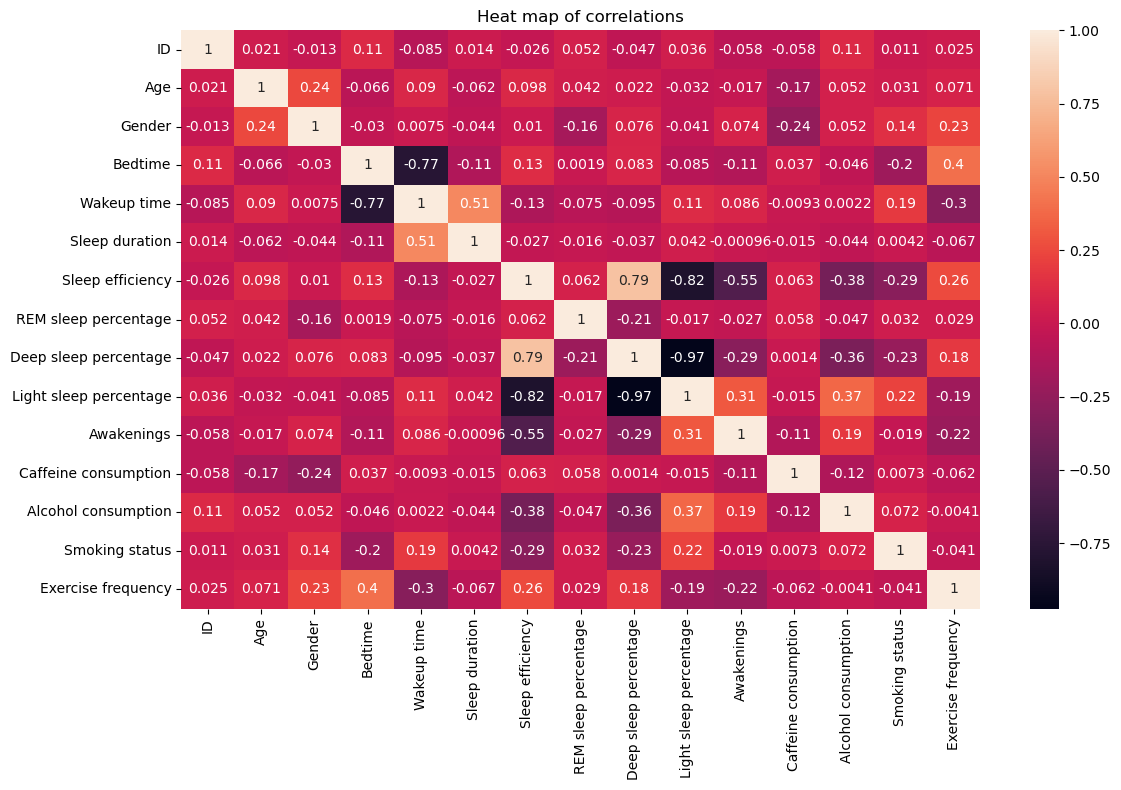

In [40]:
fig, ax = plt.subplots(figsize=(12,  8))
sns.heatmap(correlation_matrix, annot=True, ax=ax)
plt.title("Heat map of correlations")
fig.tight_layout()

#The correlation matrix shows a high correlation between the features 'Bedtime' and 'Wakeup time', 
#as well as between 'Deep sleep percentage' and 'Light sleep percentage'. 
#It is advisable not to use 'Wakeup time' and 'Light sleep percentage' when training models.

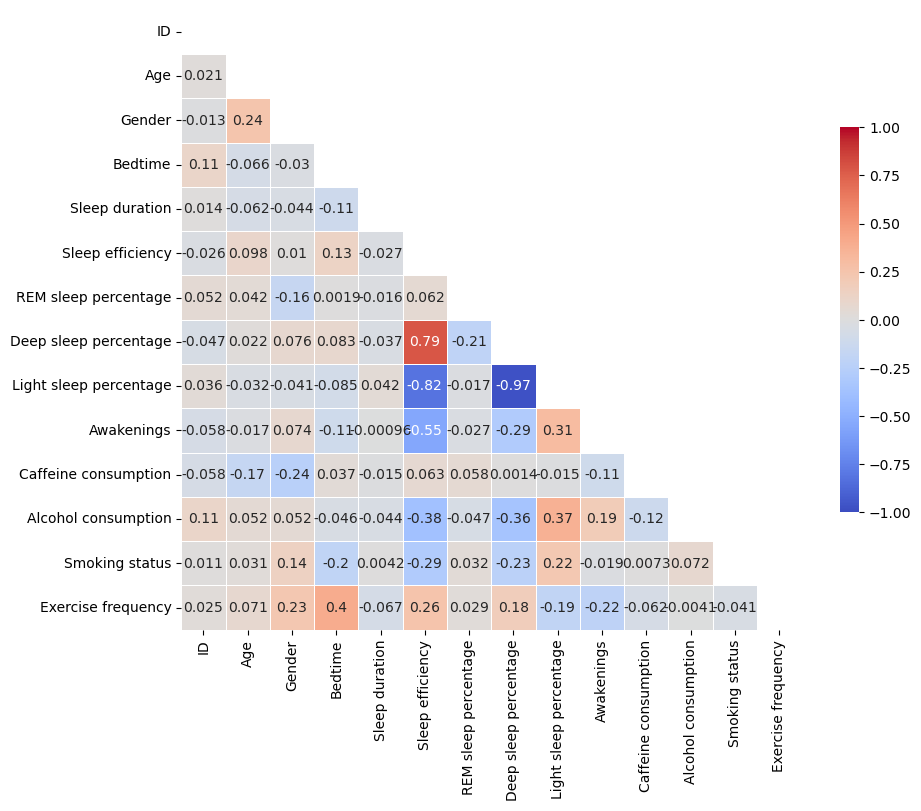

In [15]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix (without absolute value)
corr = df.select_dtypes(include="number").corr()

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Use a diverging color palette for the heatmap
cmap = sns.color_palette("coolwarm", as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, vmax=1, vmin=-1, square=True, linewidths=.5, 
            cbar_kws={"shrink": .5}, annot=True, cmap=cmap)

# Show the plot
plt.show()

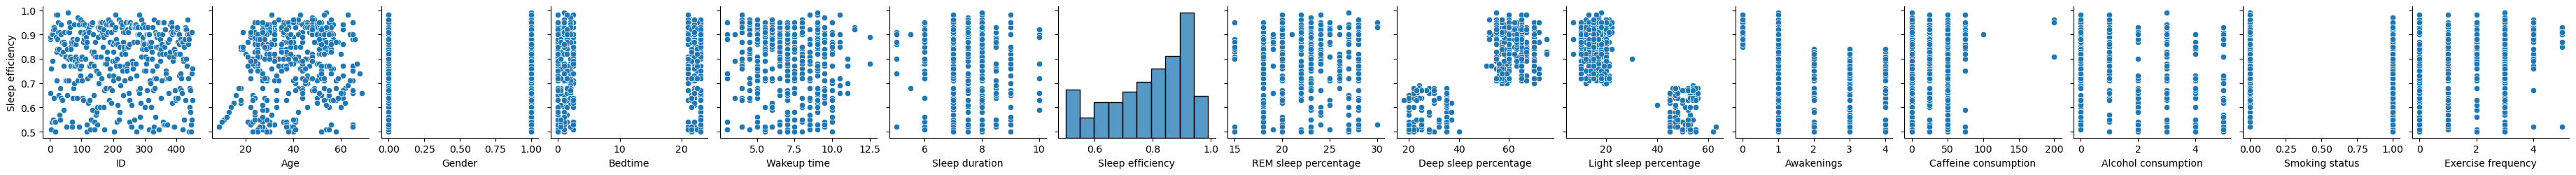

In [43]:
# checking to see the relationships b/w the target & features
sns.pairplot(df, y_vars=['Sleep efficiency'], x_vars=df.columns[:], kind='scatter');